In [5]:
from astropy.utils.data import get_pkg_data_filename
from astropy.timeseries import TimeSeries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from analysis import model
from exploration import fisher_matrix

In [6]:
example_data = get_pkg_data_filename('timeseries/kplr010666592-2009131110544_slc.fits')
kepler = TimeSeries.read(example_data, format='kepler.fits', unit_parse_strict='silent')
y = np.asarray(kepler['sap_flux'])
y = y[~np.isnan(kepler['sap_flux'])]
t = np.asarray(kepler.time.jd)
t = t[~np.isnan(kepler['sap_flux'])]
sigma_y = np.asarray(kepler['sap_flux_err'])
sigma_y = sigma_y[~np.isnan(kepler['sap_flux'])]


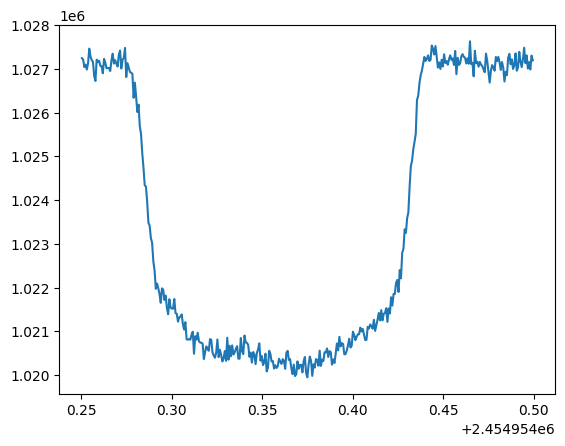

In [7]:
# limit data to 54 < t < 54.5
mask = (t > 2454954.25) & (t < 2454954.5)
t = t[mask]
y = y[mask]
sigma_y = sigma_y[mask]
plt.plot(t, y)

In [8]:
cov_estimate = np.diag(np.square(sigma_y))

P0 = 2.2 # period in days
T0 = 0.15 # dip length in days
phi0 = 0.69*np.pi
F0 = 1.027e6 # level
delta0 = 0.005 # relative dip  = (R_p/R_*)^2   

eps = (t[1] - t[0]) * 10e-10
print(eps)

map_values = [P0, T0, phi0, F0, delta0]
fisher = fisher_matrix(model, map_values, t, cov_estimate, epsilon=1e-6)
print(np.diag(fisher))
fisher_cov = np.linalg.inv(fisher)

# print diagonal of the fisher matrix
print(np.diag(fisher_cov))

6.812247447669506e-13
[3.94577313e+13 5.24631611e+07 2.79044045e+07 1.85561739e-02
 1.56955555e+10]
[9.36430633e-11 2.39466464e-08 3.58366986e-08 1.48967633e+02
 2.36596611e-07]
